https://colab.research.google.com/drive/14QwQE6IUMCRmSdG-BzX0owPoIrckTdjg?usp=sharing

# Exploratory Data Analysis:


https://drive.google.com/file/d/1x-QLBM52eoOZc0M979ENCzfveMeDv_2f/view?usp=sharing

https://drive.google.com/file/d/16asJlnmW4bCdbGRhioehBKBRYcDeOGQe/view?usp=sharing

# Problem Statement
 This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

- Content Diversity: What genres and categories dominate the platform?
Regional Availability: How does content distribution vary across different regions?

- Trends Over Time: How has Amazon Prime’s content library evolved?

- IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?
- By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.

In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [453]:
credits=pd.read_csv('/content/credits.csv')
titles=pd.read_csv('/content/titles.csv')


In [454]:
credits.head(5)

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [455]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [456]:
titles.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [457]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

#**Data accessing**

**Column Types**

**Numerical**
1. credits-  person id,
2. titles- release_year,runtime ,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score

**Categorical**
1. credits--role,id (links to titles.csv),character
2. titles- id,title,type,description,age_certification,genres,production_countries,imdb_id

**Quality issue**
1. **titles.csv**
 -  genres and production_countries:list
 - seasons: only applies to tv shows, so it's mostly null for movies
2. **credits.csv**
- role- in role there are two category -- actor and director

**Quality Issues**
1. **titles.csv**
-  description: Contains missing values
-  age_certification: High number of missing values
-  imdb_id: Some rows are missing
-  imdb_score, imdb_votes, tmdb_popularity, tmdb_score:  contain missing values
2. **credits.csv**
-  character: Missing in many rows
-  Same person_id

# Data cleaning

In [458]:
titles.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8


In [459]:
#make copy for data set
titles_df=titles.copy()
credits_df=credits.copy()

In [460]:
titles_df['genres'] = titles_df['genres'].fillna('[]').str.strip("[]").str.replace("'", "")

In [461]:
#genres and production_countries:list
genres_count= titles_df['genres'].str.split(",").apply(len)
genres_count

,genres
0,6
1,6
2,3
3,3
4,3
...,...
9866,1
9867,1
9868,1
9869,2


In [462]:
titles_df.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"action, drama, war, western, comedy, european",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0


In [463]:
#new genre count coloumn
titles_df.insert(8,'genres_count',genres_count)

In [464]:
titles_df['genres_count'].value_counts()

,count
genres_count,
1,3267
2,2916
3,2207
4,1006
5,357
6,88
7,23
8,7


In [465]:
#reducing list
titles_df['production_countries']=titles_df['production_countries'].str.strip('[]').str.replace("'",'')

In [466]:
#seasons: only applies to tv shows, so it's mostly null for movies
titles_df['seasons'].fillna('N/A', inplace=True)


<ipython-input-466-8674961beb59>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles_df['seasons'].fillna('N/A', inplace=True)
<ipython-input-466-8674961beb59>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  titles_df['seasons'].fillna('N/A', inplace=True)


In [467]:
titles_df['seasons'].isnull().sum()

np.int64(0)

In [468]:
credits_df['role'].value_counts()

,count
role,
ACTOR,115846
DIRECTOR,8389


In [469]:
credits_df[credits_df['id']=='tm19248']

,person_id,id,name,character,role
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR
5,28714,tm19248,Glen Cavender,Captain Anderson,ACTOR
6,28715,tm19248,Jim Farley,General Thatcher,ACTOR
7,27348,tm19248,Frederick Vroom,A Southern General,ACTOR
8,28716,tm19248,Charles Henry Smith,Annabelle's Father,ACTOR
9,28718,tm19248,Joe Keaton,Union General,ACTOR
10,28721,tm19248,Al St. John,Officer on Horseback (uncredited),ACTOR
11,28717,tm19248,Frank Barnes,Annabelle's Brother,ACTOR
12,28719,tm19248,Mike Donlin,Union General,ACTOR


In [470]:
#'character' missing values
credits_df['character'].isnull().sum()

np.int64(16287)

In [471]:
credits_df['character'].fillna('Unknown', inplace=True)

<ipython-input-471-22c67df1cd89>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credits_df['character'].fillna('Unknown', inplace=True)


In [472]:
#description: Contains missing values
titles_df['description'].isnull() #as we are not doing text ananlysis here so that why i m dropping the decription coloumn

,description
0,False
1,False
2,False
3,False
4,False
...,...
9866,False
9867,False
9868,False
9869,False


In [473]:
titles_df.drop(columns=['description'], inplace=True)

In [474]:
#age certification
titles_df['age_certification'].value_counts()

,count
age_certification,
R,1249
PG-13,588
PG,582
G,269
TV-MA,217
TV-14,188
TV-PG,91
TV-Y,78
TV-G,57


In [475]:
#checking rows if i can drop what if i have num of missing value -coloumns in a same row
columns_to_check = ['imdb_score', 'tmdb_popularity', 'imdb_votes', 'tmdb_score','production_countries']
threshold = 3
titles_df[titles_df[columns_to_check].isnull().sum(axis=1) > threshold]
titles_df.drop(9838,inplace=True)
titles_df.drop(9865,inplace=True)

In [476]:
columns_to_check = ['imdb_score', 'tmdb_popularity', 'imdb_votes', 'tmdb_score','production_countries']
threshold = 3
titles_df[titles_df[columns_to_check].isnull().sum(axis=1) > threshold]

,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
672,tm582037,Ye Shang Hai,MOVIE,1941,NaN,62,drama,1,,N/A,tt3594666,NaN,NaN,NaN,NaN
731,tm686160,Peculiar Pets,MOVIE,1921,NaN,47,documentation,1,,N/A,tt0981329,NaN,NaN,NaN,NaN
795,tm769632,Sri Valli,MOVIE,1945,NaN,114,drama,1,,N/A,tt0240922,NaN,NaN,NaN,NaN
1661,tm544335,Dhonni Meye,MOVIE,1975,NaN,133,drama,1,,N/A,tt5526358,NaN,NaN,NaN,NaN
1664,tm539392,John Brown's Body,MOVIE,1962,NaN,90,drama,1,,N/A,tt5868054,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9823,ts290388,Daddydelphia,SHOW,2021,NaN,30,"animation, comedy",2,,1.0,tt14244932,NaN,NaN,NaN,NaN
9827,tm1099582,Hero 115,MOVIE,2021,NaN,62,drama,1,,N/A,tt15287084,NaN,NaN,NaN,NaN
9841,tm1153832,Last Summer in Oxford,MOVIE,2021,NaN,63,"comedy, drama",2,,N/A,tt16219994,NaN,NaN,NaN,NaN
9848,tm1008661,Trying Grace,MOVIE,2021,NaN,88,drama,1,,N/A,tt13563658,NaN,NaN,NaN,NaN


In [477]:
titles_df['age_certification'].isnull().sum()

np.int64(6485)

In [478]:
missing_ratio = titles_df['age_certification'].isnull().mean() * 100
missing_ratio

np.float64(65.71081163238424)

In [479]:
titles_df['age_certification'].fillna('Missing', inplace=True)

<ipython-input-479-83a4b18cbac1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles_df['age_certification'].fillna('Missing', inplace=True)


In [480]:
#imdb_id: Some rows are missing
titles_df['imdb_id'].isnull().sum()

np.int64(667)

In [481]:
titles_df.groupby('type')['imdb_id'].apply(lambda x: x.isnull().sum())

,imdb_id
type,
MOVIE,559
SHOW,108


In [482]:
titles_df['imdb_id'].fillna('Unknown', inplace=True)

<ipython-input-482-27ca0fc5a7b9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles_df['imdb_id'].fillna('Unknown', inplace=True)


In [483]:
#imdb_score, imdb_votes, tmdb_popularity, tmdb_score: contain missing values
titles_df['imdb_score'].isnull().sum()

np.int64(1019)

In [484]:
titles_df['imdb_score'].fillna(titles_df['imdb_score'].mean(), inplace=True)


<ipython-input-484-acac5618befd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles_df['imdb_score'].fillna(titles_df['imdb_score'].mean(), inplace=True)


In [485]:
titles_df['imdb_votes'].isnull().sum()

np.int64(1029)

In [486]:
titles_df['imdb_votes'].value_counts()

,count
imdb_votes,
11.0,43
28.0,43
25.0,34
12.0,34
24.0,33
...,...
4030.0,1
4188.0,1
6231.0,1


In [487]:
titles_df['imdb_votes'].fillna(0, inplace=True)

<ipython-input-487-81a45012b998>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles_df['imdb_votes'].fillna(0, inplace=True)


In [488]:
titles_df['tmdb_popularity'].fillna(0, inplace=True)

<ipython-input-488-1bbf78d8d27b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles_df['tmdb_popularity'].fillna(0, inplace=True)


In [489]:
 #tmdb_popularity, tmdb_score: contain missing values
 titles_df['tmdb_score'].isnull().sum()

np.int64(2080)

In [490]:
titles_df['tmdb_popularity'].isnull().sum()

np.int64(0)

In [491]:
#as we can see in the data some value is beyond --outliers are there so using quantile method to reduce it
Q1 = titles_df['tmdb_score'].quantile(0.25)
Q3 = titles_df['tmdb_score'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(1.8000000000000007)

In [492]:
filtered_data=titles_df[(titles_df['tmdb_score'] >= (Q1 - 1.5 * IQR)) & (titles_df['tmdb_score'] <= (Q3 + 1.5 * IQR))]
mean=filtered_data['tmdb_score'].mean()

In [493]:
titles_df['tmdb_score'].fillna(round(mean,2), inplace=True)

<ipython-input-493-a715bb5392be>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titles_df['tmdb_score'].fillna(round(mean,2), inplace=True)


In [494]:
titles_df['tmdb_score'].isnull().sum()

np.int64(0)

In [495]:
#charcters have missing values --already filled with unknown
credits_df.isnull().sum()

,0
person_id,0
id,0
name,0
character,0
role,0


In [496]:
titles_df.isnull().sum()

,0
id,0
title,0
type,0
release_year,0
age_certification,0
runtime,0
genres,0
genres_count,0
production_countries,0
seasons,0


In [497]:
#checking duplicates of person id in credit
credits_df['person_id'].duplicated().sum()

np.int64(43727)

In [498]:
credits_df.shape

(124235, 5)

In [499]:
credits_df[credits_df['person_id']==21174]

,person_id,id,name,character,role
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
26,21174,tm19248,Buster Keaton,Unknown,DIRECTOR
642,21174,tm3541,Buster Keaton,William 'Willie' Canfield Jr.,ACTOR
649,21174,tm3541,Buster Keaton,Unknown,DIRECTOR
2230,21174,tm16924,Buster Keaton,"Ronald, The Boy",ACTOR
2238,21174,tm16924,Buster Keaton,Unknown,DIRECTOR
4412,21174,tm73200,Buster Keaton,Lonesome Polecat,ACTOR
4423,21174,tm73200,Buster Keaton,Unknown,ACTOR
4776,21174,tm57795,Buster Keaton,Policeman,ACTOR
5188,21174,tm56395,Buster Keaton,Reginald Irving,ACTOR


# merging data
 join (merge) titles_df and credits_df — it will significantly enrich your EDA and allow for much deeper insights.

In [500]:
movie_df=titles_df.merge(credits_df, on='id', how='left')

In [501]:
movie_df.isnull().sum()

,0
id,0
title,0
type,0
release_year,0
age_certification,0
runtime,0
genres,0
genres_count,0
production_countries,0
seasons,0


In [502]:
movie_df[movie_df[['person_id', 'name', 'character', 'role']].isnull().all(axis=1)]

,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
2063,tm348419,Payoff in the Pacific,MOVIE,1945,Missing,56,,1,,N/A,Unknown,5.976395,0.0,0.6,6.02,NaN,NaN,NaN,NaN
7531,tm18966,D-Day: The Normandy Invasion,MOVIE,1945,Missing,21,,1,,N/A,Unknown,5.976395,0.0,0.6,8.00,NaN,NaN,NaN,NaN
12309,tm582037,Ye Shang Hai,MOVIE,1941,Missing,62,drama,1,,N/A,tt3594666,5.976395,0.0,0.0,6.02,NaN,NaN,NaN,NaN
13278,tm686160,Peculiar Pets,MOVIE,1921,Missing,47,documentation,1,,N/A,tt0981329,5.976395,0.0,0.0,6.02,NaN,NaN,NaN,NaN
14212,tm769632,Sri Valli,MOVIE,1945,Missing,114,drama,1,,N/A,tt0240922,5.976395,0.0,0.0,6.02,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125286,tm1076901,Jaan! Jaan Loge Kya?,MOVIE,2021,Missing,114,drama,1,,N/A,tt14954126,3.800000,12.0,0.6,6.02,NaN,NaN,NaN,NaN
125287,tm1084430,Parigettu Parigettu,MOVIE,2021,Missing,130,"thriller, crime",2,,N/A,tt15094256,7.300000,1292.0,0.0,6.02,NaN,NaN,NaN,NaN
125315,tm1090675,Burning Man: The Musical,MOVIE,2021,Missing,74,,1,,N/A,tt15194208,7.400000,231.0,0.6,6.02,NaN,NaN,NaN,NaN
125316,tm1142918,Ty Barnett: Yep,MOVIE,2021,PG,25,,1,,N/A,tt11979448,5.976395,0.0,0.6,5.80,NaN,NaN,NaN,NaN


In [503]:
movie_df.shape

(125352, 19)

In [504]:
movie_df = movie_df[~movie_df[['person_id', 'name', 'character', 'role']].isnull().all(axis=1)]

In [505]:
movie_df.isna().sum()

,0
id,0
title,0
type,0
release_year,0
age_certification,0
runtime,0
genres,0
genres_count,0
production_countries,0
seasons,0


In [506]:
movie_df['production_countries'] = movie_df['production_countries'].str.strip().replace('', np.nan)

# Now fill NaN ( 'Unknown', as needed)
movie_df['production_countries'] = movie_df['production_countries'].fillna('Unknown')

In [507]:
movie_df.to_csv('movie_df.csv', index=False)
from google.colab import files
files.download('movie_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Visualisation

# 1. Content Diversity:
 What genres and categories dominate the platform?

In [508]:
movie_df.head(3)

,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",6,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",6,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",6,US,26.0,tt0850645,8.6,1092.0,15.424,7.6,31461.0,Larry Fine,Larry,ACTOR


In [509]:
group_as_per_id=movie_df.groupby('id').first().reset_index()

In [510]:
genre_count=group_as_per_id['genres'].dropna().str.split(',').explode().str.strip().value_counts().head(10)

<ipython-input-511-40867075bfa7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.values, y=genre_count.index, palette='viridis')


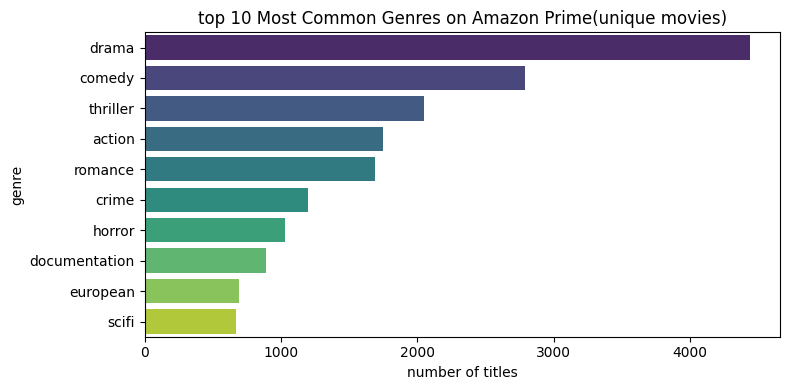

In [511]:
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_count.values, y=genre_count.index, palette='viridis')
plt.title('top 10 Most Common Genres on Amazon Prime(unique movies)')
plt.xlabel('number of titles')
plt.ylabel('genre')
plt.tight_layout()
plt.show()

# 2. Regional Availability:
 How does content distribution vary across different regions?

In [512]:
group_as_per_id['production_countries']=='Unknown'
group_as_per_id_country=group_as_per_id[group_as_per_id != 'Unknown']

In [513]:
top_country=group_as_per_id_country['production_countries'].dropna().str.split(",").explode().str.strip().value_counts().head(10)


In [514]:
top_country

,count
production_countries,
US,5070
IN,985
GB,854
CA,498
FR,235
JP,187
DE,165
AU,164
IT,143


<ipython-input-515-1c838cb8c29c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_country.index, y=top_country.values, palette='mako')


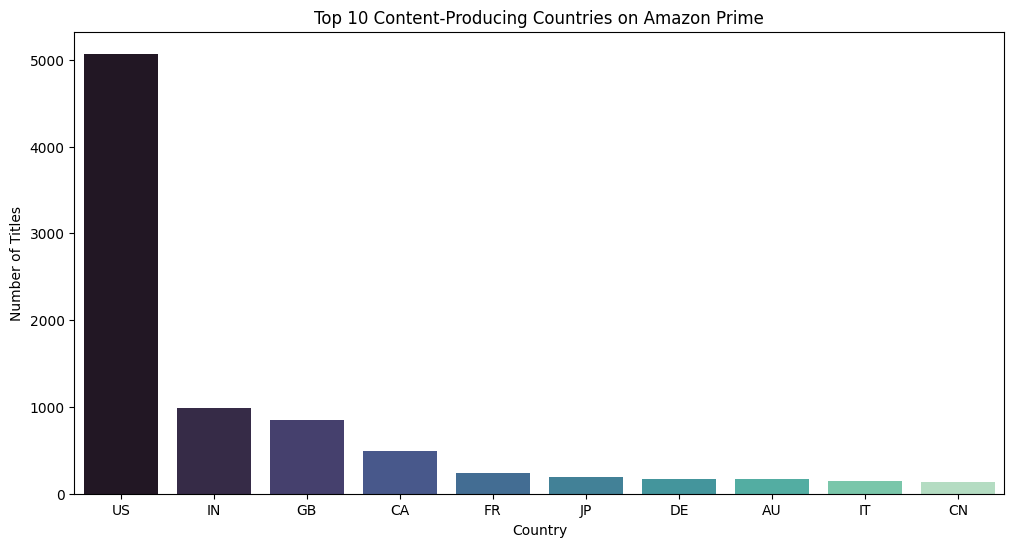

In [515]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_country.index, y=top_country.values, palette='mako')
plt.title('Top 10 Content-Producing Countries on Amazon Prime')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

# 3. Trends Over Time:
 How has Amazon Prime’s content library evolved?

In [516]:
trend_data=group_as_per_id.groupby('release_year')['title'].count().reset_index()

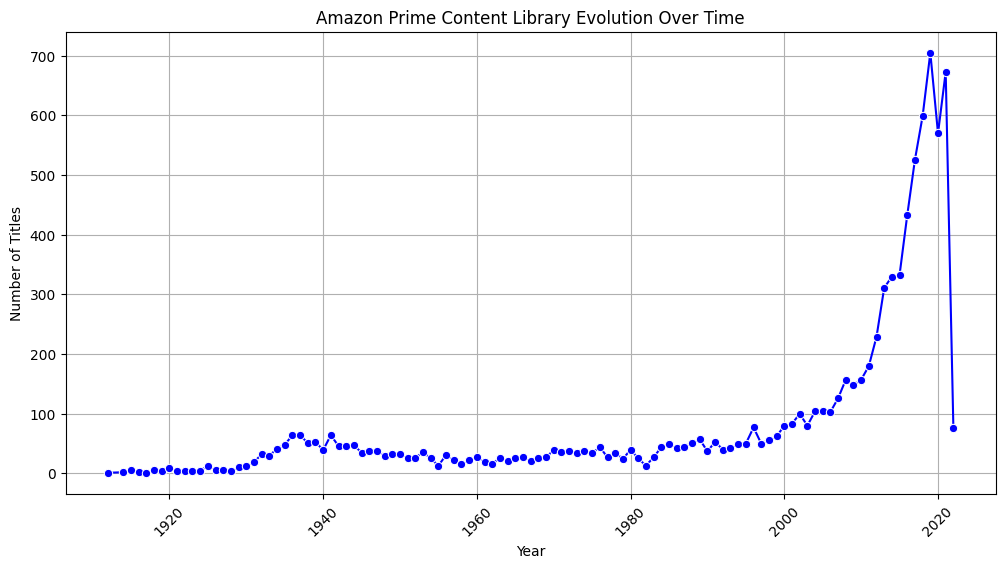

In [517]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='title', data=trend_data, marker='o', color='blue')
plt.title('Amazon Prime Content Library Evolution Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Age Certification:trend over time

In [518]:
group_as_per_id_age=group_as_per_id[group_as_per_id['age_certification']!='Missing']

age_cert_title_counts = group_as_per_id_age.groupby(['release_year', 'age_certification'])['title'].count().reset_index()
age_cert_wide=age_cert_title_counts.pivot(index='release_year', columns='age_certification', values='title').fillna(0)

In [519]:
every_10_year = age_cert_wide[age_cert_wide.index % 10 == 0]

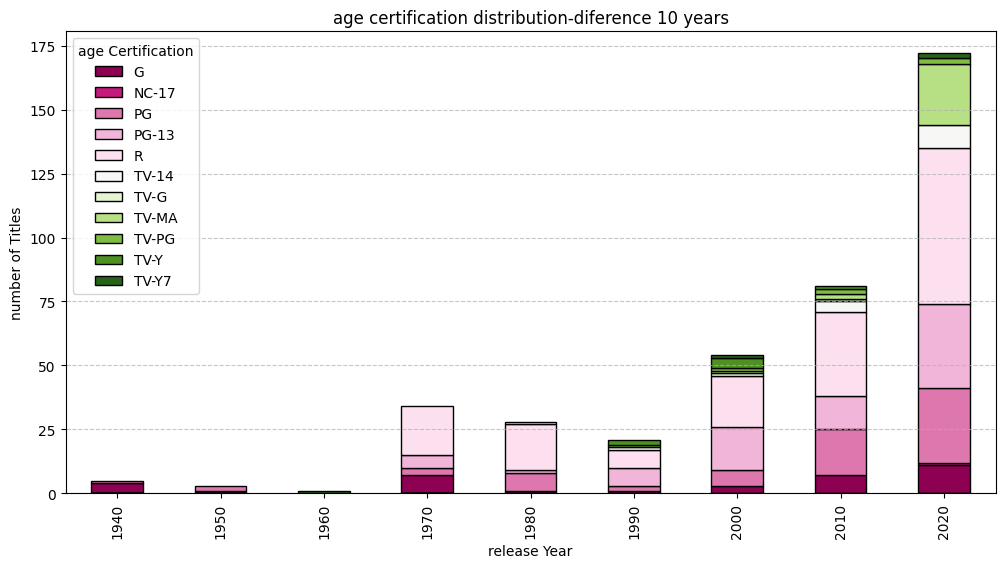

In [520]:
every_10_year.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='PiYG', edgecolor='black')
plt.title('age certification distribution-diference 10 years')
plt.xlabel('release Year')
plt.ylabel('number of Titles')
plt.legend(title='age Certification',loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. IMDb Ratings & Popularity:
What are the highest-rated or most popular shows on the platform?

In [521]:
group_as_per_id.head(3)

,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm100001,The Lucky Texan,MOVIE,1934,Missing,61,"western, action, romance",3,US,N/A,tt0025440,5.6,1213.0,4.079,4.7,25629.0,John Wayne,Jerry Mason,ACTOR
1,tm1000022,Boonie Bears: The Wild Life,MOVIE,2021,Missing,99,"scifi, animation",2,CN,N/A,tt11654032,5.4,117.0,6.135,3.8,1793831.0,Chris Boike,Unknown,ACTOR
2,tm1000169,Bad Cupid,MOVIE,2021,Missing,81,"romance, comedy",2,Unknown,N/A,tt11333938,4.4,181.0,3.295,4.8,2853.0,John Rhys-Davies,Archie,ACTOR


In [522]:
#shows---top 10  imdb_rated shows:
shows_in_data = group_as_per_id[group_as_per_id['type'] == 'SHOW']
top_imdb_shows = shows_in_data.sort_values(by=['imdb_score', 'imdb_votes'], ascending=[False, False])
top_imdb_shows=top_imdb_shows[['title', 'release_year', 'imdb_score', 'imdb_votes']].head(10)


In [523]:
#tmdb popularity
top_tmdb_shows=shows_in_data.sort_values(by='tmdb_popularity', ascending=False)
top_tmdb_shows=top_tmdb_shows[['title', 'release_year', 'tmdb_popularity']].head(10)

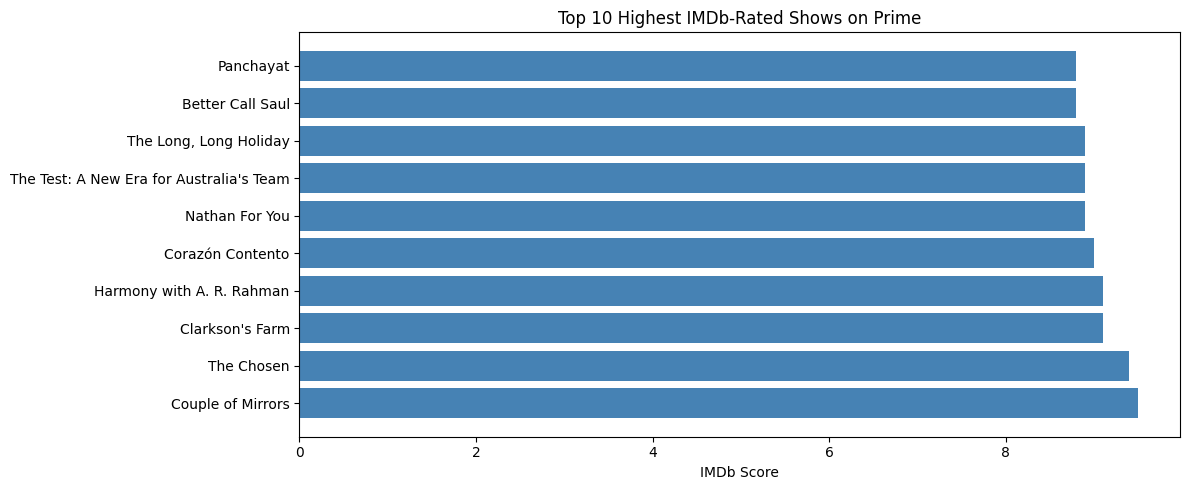

In [524]:
plt.figure(figsize=(12, 5))
plt.barh(top_imdb_shows['title'], top_imdb_shows['imdb_score'], color='steelblue')
plt.title('Top 10 Highest IMDb-Rated Shows on Prime')
plt.xlabel('IMDb Score')
plt.tight_layout()
plt.show()

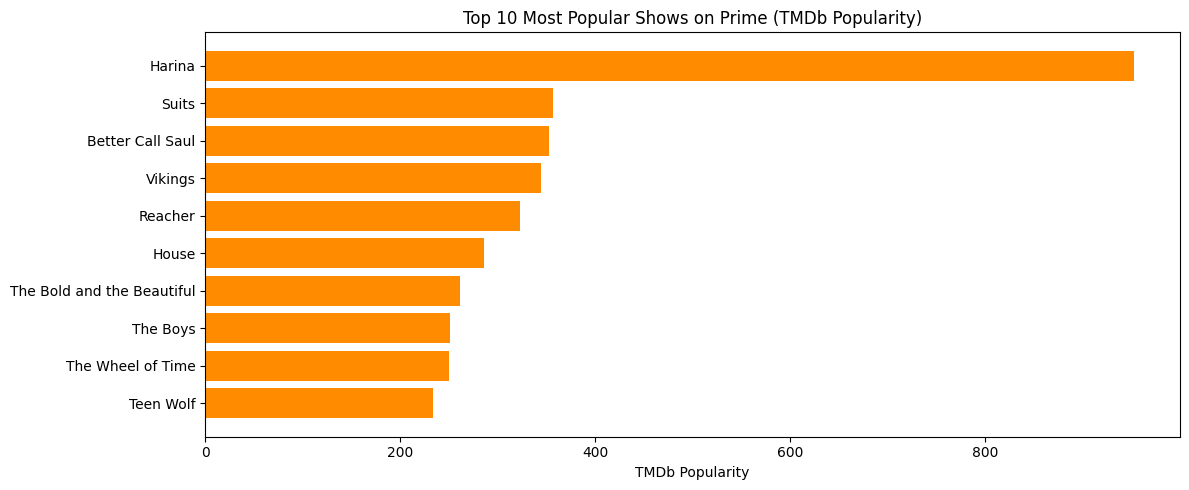

In [525]:
plt.figure(figsize=(12, 5))
plt.barh(top_tmdb_shows['title'], top_tmdb_shows['tmdb_popularity'], color='darkorange')
plt.gca().invert_yaxis()
plt.title('Top 10 Most Popular Shows on Prime (TMDb Popularity)')
plt.xlabel('TMDb Popularity')
plt.tight_layout()
plt.show()

#

In [526]:
movie_df

,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",6,US,26.0,tt0850645,8.6,1092.0,15.424,7.60,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",6,US,26.0,tt0850645,8.6,1092.0,15.424,7.60,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",6,US,26.0,tt0850645,8.6,1092.0,15.424,7.60,31461.0,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,1926,Missing,78,"action, drama, war, western, comedy, european",6,US,N/A,tt0017925,8.2,89766.0,8.647,8.00,21174.0,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,1926,Missing,78,"action, drama, war, western, comedy, european",6,US,N/A,tt0017925,8.2,89766.0,8.647,8.00,28713.0,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125346,tm1054116,Baikunth,MOVIE,2021,Missing,72,"family, drama",2,Unknown,N/A,tt14331982,8.4,49.0,0.645,6.02,1938589.0,Sangam Shukla,Madhav,ACTOR
125347,tm1054116,Baikunth,MOVIE,2021,Missing,72,"family, drama",2,Unknown,N/A,tt14331982,8.4,49.0,0.645,6.02,1938565.0,Vijay Thakur,Sanjay Thakur,ACTOR
125348,tm1054116,Baikunth,MOVIE,2021,Missing,72,"family, drama",2,Unknown,N/A,tt14331982,8.4,49.0,0.645,6.02,728899.0,Vanya Wellens,Budhiya,ACTOR
125349,tm1054116,Baikunth,MOVIE,2021,Missing,72,"family, drama",2,Unknown,N/A,tt14331982,8.4,49.0,0.645,6.02,1938620.0,Vishwa Bhanu,Gissu,ACTOR


# Content Length
•	Is there a correlation between runtime and IMDb score or TMDb score?


In [527]:
correlation_matrix = group_as_per_id[['runtime', 'imdb_score', 'tmdb_score']].corr()
correlation_matrix


,runtime,imdb_score,tmdb_score
runtime,1.000000,-0.072234,-0.077117
imdb_score,-0.072234,1.000000,0.516344
tmdb_score,-0.077117,0.516344,1.000000


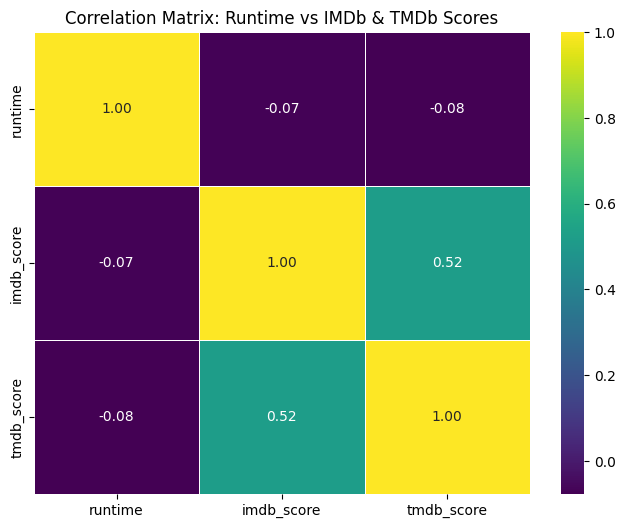

In [528]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Runtime vs IMDb & TMDb Scores')
plt.show()

# Seasonal Content
•	How do shows with more seasons compare to those with fewer seasons in terms of IMDb ratings?


In [529]:
threshold_season=3
group_as_per_id_season=group_as_per_id[group_as_per_id['seasons']!='N/A']
fewer_seasons=group_as_per_id_season[group_as_per_id_season['seasons']<=threshold_season]
more_seasons=group_as_per_id_season[group_as_per_id_season['seasons']>threshold_season]
avg_imdb_fewer = fewer_seasons['imdb_score'].mean()
avg_imdb_more = more_seasons['imdb_score'].mean()
#making a new coloumn
fewer_seasons['seasons_group'] = 'Fewer Seasons'
more_seasons['seasons_group'] = 'More Seasons'
combined_df = pd.concat([fewer_seasons, more_seasons])
combined_df

<ipython-input-529-bedabca51a07>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fewer_seasons['seasons_group'] = 'Fewer Seasons'
<ipython-input-529-bedabca51a07>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_seasons['seasons_group'] = 'More Seasons'


,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role,seasons_group
7852,ts10058,Cosmic Quantum Ray,SHOW,2010,TV-G,22,"action, family, animation, documentation",4,"FR, US, DE",1.0,tt1398547,5.6,44.0,3.408,10.0,439.0,Sam Vincent,Robbie Shipton / Justin (voice),ACTOR,Fewer Seasons
7853,ts101897,Ming Dynasty,SHOW,2019,Missing,45,"drama, fantasy, history",3,CN,1.0,tt9638680,7.8,92.0,24.602,8.7,7869.0,Tang Wei,Sun Ruowei,ACTOR,Fewer Seasons
7854,ts102139,Sergio Ramos,SHOW,2019,Missing,33,"sport, documentation, reality",3,US,2.0,tt9702106,5.3,449.0,5.939,4.4,228361.0,Sergio Ramos,Self,ACTOR,Fewer Seasons
7855,ts102921,Corazón Contento,SHOW,2018,Missing,27,"comedy, drama",2,MX,1.0,tt9495714,9.0,43.0,1.400,10.0,1369337.0,Lilía Herrera,Rosita Muñoz,ACTOR,Fewer Seasons
7857,ts10383,Big Sky,SHOW,1997,Missing,44,"drama, comedy, music",3,AU,2.0,tt5578664,6.7,119.0,8.092,8.0,14225.0,Gary Sweet,Unknown,ACTOR,Fewer Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8807,ts86486,LOL: Last One Laughing,SHOW,2018,Missing,31,"comedy, reality",2,MX,4.0,tt8783862,3.5,546.0,172.955,7.3,17330.0,Eugenio Derbez,Self - Host,ACTOR,More Seasons
8820,ts8805,Dinosaur Train,SHOW,2009,TV-Y,19,"animation, family",2,US,7.0,tt1460205,6.5,1178.0,23.343,6.9,2202427.0,김정교,Unknown,DIRECTOR,More Seasons
8845,ts9142,The Bold and the Beautiful,SHOW,1987,TV-14,21,"drama, romance",2,US,34.0,tt0092325,3.3,7627.0,260.884,5.8,243762.0,Katherine Kelly Lang,Brooke Logan,ACTOR,More Seasons
8856,ts968,Bobby's World,SHOW,1990,TV-Y,22,"animation, comedy, family",3,US,7.0,tt0103373,7.2,4503.0,7.875,7.0,99567.0,Gary Owens,Unknown,ACTOR,More Seasons


<ipython-input-530-24c67ff41d95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='seasons_group', y='imdb_score', data=combined_df, palette="rocket_r")


Text(0, 0.5, 'IMDb Score')

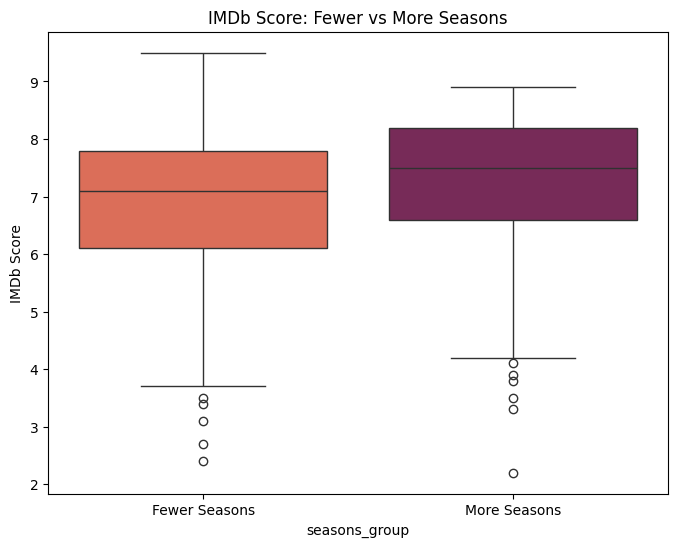

In [530]:

# Plotting with seaborn for IMDb score comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='seasons_group', y='imdb_score', data=combined_df, palette="rocket_r")
plt.title('IMDb Score: Fewer vs More Seasons')
plt.ylabel('IMDb Score')



#6. Impact of Actors and Roles
•	Which actors are associated with the highest-rated content based on IMDb and TMDb scores?



In [531]:
group_as_per_id['imdb_score'].describe()

,imdb_score
count,8861.000000
mean,5.935939
std,1.265631
min,1.100000
25%,5.200000
50%,5.976395
75%,6.800000
max,9.900000


In [532]:
group_as_per_id['tmdb_score'].describe()

,tmdb_score
count,8861.000000
mean,5.976434
std,1.387794
min,0.800000
25%,5.300000
50%,6.020000
75%,6.700000
max,10.000000


In [533]:
#heighst rated content
actor_wise=group_as_per_id[(group_as_per_id['imdb_score']>8.0)|(group_as_per_id['tmdb_score']>8.0)]
actor_wise=actor_wise[actor_wise['role']=='ACTOR']
actor_wise.head(2)

,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
13,tm100158,Investigation of a Citizen Above Suspicion,MOVIE,1970,R,111,"drama, thriller, european, crime",4,IT,N/A,tt0065889,8.0,11130.0,8.996,8.2,8357.0,Gian Maria Volonté,Dottore,ACTOR
45,tm1010577,Chris Gethard: Half My Life,MOVIE,2021,Missing,60,"comedy, documentation",2,Unknown,N/A,tt13665118,8.1,21.0,1.583,9.0,27653.0,Chris Gethard,Self,ACTOR


In [534]:
actor_wise_summary=actor_wise.groupby(['person_id', 'name']).agg({
    'title':'count',
    'imdb_score':'mean',
    'tmdb_score':'mean'
}).rename(columns={"title":'movie_count'}).sort_values(by='movie_count',ascending=False).reset_index().head(10)
actor_wise_summary

,person_id,name,movie_count,imdb_score,tmdb_score
0,56738.0,Mitzi Gaynor,4,8.450000,6.020000
1,152512.0,Jim Al-Khalili,3,7.558798,7.966667
2,119473.0,Kamal Haasan,3,7.800000,7.933333
3,18771.0,George Carlin,3,8.400000,7.600000
4,110339.0,Ruth Goodman,3,8.700000,9.433333
5,67675.0,Suriya,2,9.250000,7.650000
6,63319.0,Ben Diskin,2,6.750000,8.650000
7,68292.0,Mammootty,2,8.600000,7.150000
8,2144.0,Chris O'Dowd,2,8.150000,7.150000
9,38632.0,Shah Rukh Khan,2,8.050000,8.000000


<ipython-input-535-a0d72f38d1af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


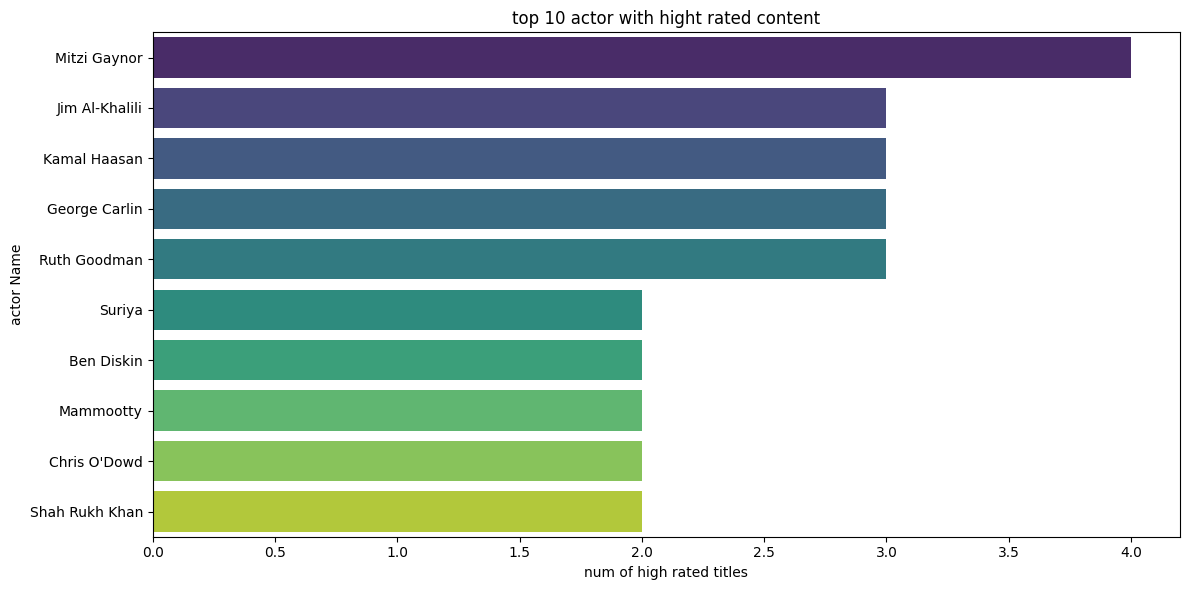

In [535]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=actor_wise_summary,
    x='movie_count',
    y='name',
    palette='viridis'
)
plt.xlabel('num of high rated titles')
plt.ylabel('actor Name')
plt.title('top 10 actor with hight rated content')
plt.tight_layout()
plt.show()

#**5. Strategic Business Insights**
For content creators, investors, and Amazon itself:


# Content Investment Trends:
What genres/countries/times get best ratings → where to invest?



.

In [536]:
group_as_per_id.head(1)

,id,title,type,release_year,age_certification,runtime,genres,genres_count,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm100001,The Lucky Texan,MOVIE,1934,Missing,61,"western, action, romance",3,US,N/A,tt0025440,5.6,1213.0,4.079,4.7,25629.0,John Wayne,Jerry Mason,ACTOR


In [537]:
group_as_per_id_genre=group_as_per_id[group_as_per_id['genres']!=""]

In [538]:
group_as_per_id_genre['genres'] = group_as_per_id_genre['genres'].str.split(',')
exploded_data = group_as_per_id_genre.explode('genres')
exploded_data['genres'] = exploded_data['genres'].str.strip()
best_rated_by_genre = exploded_data.groupby('genres')['imdb_score'].mean().reset_index()
best_rated_by_genre_sorted = best_rated_by_genre.sort_values(by='imdb_score', ascending=False)

best_rated_by_genre_sorted


<ipython-input-538-abd80a759b0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_as_per_id_genre['genres'] = group_as_per_id_genre['genres'].str.split(',')


,genres,imdb_score
4,documentation,6.854459
9,history,6.723057
12,reality,6.614343
1,animation,6.417011
17,war,6.362611
15,sport,6.347944
6,european,6.291733
11,music,6.156785
5,drama,6.109856
7,family,6.083380


# User Engagement Proxy:
 Use tmdb_popularity and imdb_votes as proxies for engagement.

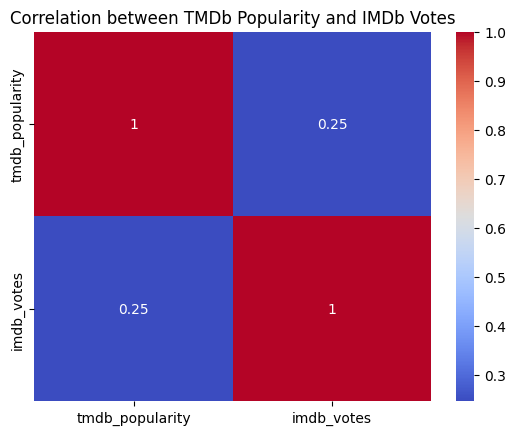

In [539]:
# Check the correlation between popularity and votes
correlation = group_as_per_id[['tmdb_popularity', 'imdb_votes']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between TMDb Popularity and IMDb Votes')
plt.show()